## 人工数据集生成

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 设置随机数种子
np.random.seed(5)

D:\SoftWare\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\SoftWare\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\SoftWare\Anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\SoftWare\Anaconda3\envs\tensorflow1\lib\site-packages\tensorf

In [2]:
# 直接采用np生成等差数列的方法，生成100个点，每个点的取值在-1~1之间
x_data = np.linspace(-1,1,100)

# y=2x+1+噪声，其中，噪声的维度与x_data一致
y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4

# np.random.randn(d0, d1, ..., dn)是从标准正态分布中返回一个或多个样本值
# 标准正态分布又称为u分布，是以0为均值，1为标准差的正态分布，记为N(0,1)
np.random.randn(10)

array([ 0.79242262,  0.17076445, -1.75374086,  0.63029648,  0.49832921,
        1.01813761, -0.84646862,  2.52080763, -1.23238611,  0.72695326])

In [3]:
# *x_data.shape值为一个元组
x_data.shape

(100,)

In [4]:
# 实参前面加上*和**时，就意味着拆包，单个*表示将元组拆成一个个单独的实参
np.random.randn(*x_data.shape)

array([ 0.04595522, -0.48713265,  0.81613236, -0.28143012, -2.33562182,
       -1.16727845,  0.45765807,  2.23796561, -1.4812592 , -0.01694532,
        1.45073354,  0.60687032, -0.37562084, -1.42192455, -1.7811513 ,
       -0.74790579, -0.36840953, -2.24911813, -1.69367504,  0.30364847,
       -0.40899234, -0.75483059, -0.40751917, -0.81262476,  0.92751621,
        1.63995407,  2.07361553,  0.70979786,  0.74715259,  1.46309548,
        1.73844881,  1.46520488,  1.21228341, -0.6346525 , -1.5996985 ,
        0.87715281, -0.09383245, -0.05567103, -0.88942073, -1.30095145,
        1.40216662,  0.46510099, -1.06503262,  0.39042061,  0.30560017,
        0.52184949,  2.23327081, -0.0347021 , -1.27962318,  0.03654264,
       -0.64635659,  0.54856784,  0.21054246,  0.34650175, -0.56705117,
        0.41367881, -0.51025606,  0.51725935, -0.30100513, -1.11840643,
        0.49852362, -0.70609387,  1.4438811 ,  0.44295626,  0.46770521,
        0.10134479, -0.05935198, -2.38669774,  1.22217056, -0.81

## 利用matplotlib画图


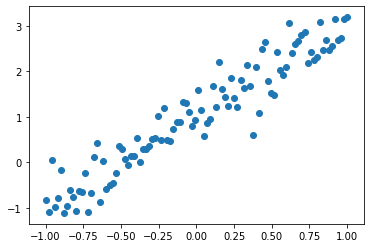

In [5]:
# 画出随机生成数据的散点图
plt.scatter(x_data, y_data)

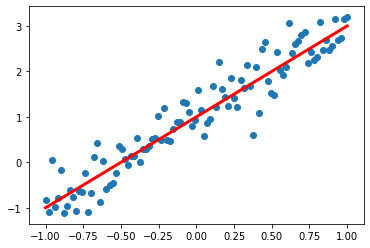

In [6]:
# 画出随机生成数据的散点图
plt.scatter(x_data, y_data)

# 画出我们想要学习得到的目标线性函数y=2x+1
plt.plot(x_data, 1.0+2.0*x_data, color='red', linewidth=3)

In [7]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

## 构建模型

In [8]:
# 定义训练数据的占位符，x是特征值，y是标签值
x = tf.placeholder('float', name='x')
y = tf.placeholder('float', name='y')


# 定义模型函数
def model(x, w ,b):
    return tf.multiply(x,w) +b


# 创建变量
# TensorFlow变量的声明函数是tf.Variable
# tf.Variable的作用是保存和更新参数
# 变量的初始值可以是随机数、常数或者通过其他变量的初始值计算得到

# 构建线性函数的斜率，变量w
w = tf.Variable(1.0, name='w0')

# 构建线性函数的截距，变量b
b = tf.Variable(0.0, name='b0')

# pred是预测值，前向计算
pred = model(x, w, b)

## 训练模型

In [9]:
# 设置训练参数

# 迭代次数（训练轮数）
train_epochs = 10

# 学习率(建议一般设成0.1-0.01之间)
learning_rate = 0.05

display_step = 10 # 控制显示loss值的粒度

## 关于学习率（learning_rate）的设置

学习率的作用：控制参数更新的幅度。  
如果学习率设置过大，可能导致参数在极值附近来回摆动，无法保证收敛。  
如果学习率设置过小，虽然能保证收敛，但优化速度会大大降低，我们需要更多迭代次数才能达到较理想的优化效果。

## 定义损失函数


In [10]:
# 损失函数用于描述预测值与真实值之间的误差，从而指导模型收敛方向
# 常见损失函数：均方差（Mean Square Error, MSE）和交叉熵（cross-entropy）

# L2损失函数
# 采用均方差作为损失函数
loss_function = tf.reduce_mean(tf.square(y-pred))

## 定义优化器


In [11]:
# 定义优化器Optimizer，初始化一个GradientDescentOptimizer
# 设置学习率和优化目标：最小化损失

# 梯度下降优化器
optimmizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

## 创建会话

In [12]:
# 声明会话
sess = tf.Session()

In [13]:
# 变量初始化
# 在真正执行计算之前，需要将所有变量初始化
# 通过tf.global_variables_initializer函数可实现对所有变量的初始化

init = tf.global_variables_initializer()

sess.run(init)

## 迭代训练

### 显示损失值

Train Epoch: 01 Step:010 loss= 0.036219940
Train Epoch: 01 Step:020 loss= 0.084148541
Train Epoch: 01 Step:030 loss= 0.000472929
Train Epoch: 01 Step:040 loss= 0.326461911
Train Epoch: 01 Step:050 loss= 0.027518081
Train Epoch: 01 Step:060 loss= 0.010233042
Train Epoch: 01 Step:070 loss= 0.127347127
Train Epoch: 01 Step:080 loss= 0.001027349
Train Epoch: 01 Step:090 loss= 0.102888055
Train Epoch: 01 Step:100 loss= 0.048337195
Train Epoch: 02 Step:110 loss= 0.036219940
Train Epoch: 02 Step:120 loss= 0.084148541
Train Epoch: 02 Step:130 loss= 0.000472929
Train Epoch: 02 Step:140 loss= 0.326461911
Train Epoch: 02 Step:150 loss= 0.027518081
Train Epoch: 02 Step:160 loss= 0.010233042
Train Epoch: 02 Step:170 loss= 0.127347127
Train Epoch: 02 Step:180 loss= 0.001027349
Train Epoch: 02 Step:190 loss= 0.102888055
Train Epoch: 02 Step:200 loss= 0.048337195
Train Epoch: 03 Step:210 loss= 0.036219940
Train Epoch: 03 Step:220 loss= 0.084148541
Train Epoch: 03 Step:230 loss= 0.000472929
Train Epoch

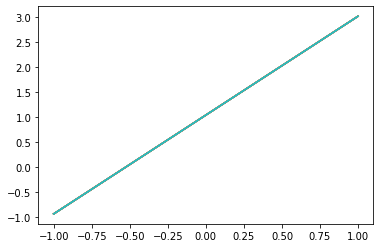

In [21]:
# 模型训练阶段，设置迭代轮次，每次通过将样本逐个输入模型，进行梯度下降优化操作，每轮迭代后，绘制出模型曲线


step = 0 # 记录训练步数
loss_list = [] # 用于保存loss值的列表

# 开始训练，轮数为epoch，采用SGD随机梯度下降优化方法
for epoch in range(train_epochs):
    for xs, ys in zip(x_data, y_data):
        _, loss = sess.run([optimmizer, loss_function], feed_dict={x: xs, y:ys})
        
        # 显示损失值loss
        # display_step:控制报告的粒度
        # 例如，如果display_step设为2，则将每训练2个样本输出一次损失值
        # 与超参数不同，修改display_step不会更改模型所学习的规律
        loss_list.append(loss)
        step = step + 1
        if step % display_step == 0:
            print('Train Epoch:', '%02d' % (epoch+1), 'Step:%03d' % (step),
                 "loss=", "{:.9f}".format(loss))
            
    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    
    plt.plot(x_data, w0temp*x_data+b0temp)# 画图

## 图形化显示损失值

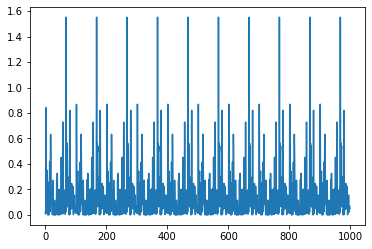

In [18]:
plt.plot(loss_list)

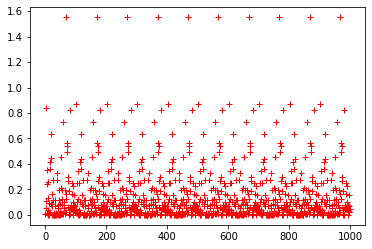

In [19]:
plt.plot(loss_list, 'r+')

In [22]:
[x for x in loss_list if x>1]

[1.551758,
 1.551758,
 1.551758,
 1.551758,
 1.551758,
 1.551758,
 1.551758,
 1.551758,
 1.551758,
 1.551758]

## 随机梯度下降  
在梯度下降法中，批量指的是用于在单次迭代中计算梯度的样本总数。  

假定批量是指整个数据集，数据集通常包含很大样本（数万甚至数千亿），此外，数据集通常包含多个特征。因此，一个批量可能相当巨大。如果是超大批量，则单词迭代就可能要花费很长时间进行计算。  

随机梯度下降法（SGD）每次迭代只使用一个样本（批量大小为1），如果进行足够的迭代，SGD也可以发挥作用。“随机”这一术语表示构成各个批量的一个样本都是随机选择的。  

小批量随机梯度下降法（小批量SGD）是介于全批量与SGD之间的折衷方案。小批量通常包含10-1000个随机选择的样本。小批量SGD可以减少SGD中的杂乱样本数量，但仍然 比全批量更高效。

## 进行预测


In [15]:
x_test = 3.21

predict = sess.run(pred, feed_dict={x:x_test})
print('预测值：%f'%predict)

target = 2*x_test + 1.0
print('目标值：%f'%target)

预测值：7.405184
目标值：7.420000
